<a href="https://colab.research.google.com/github/vilge/Global_Ai_Regression/blob/main/Global_Ai_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Veri setinin üzerinde çalışılması için Projeye Drive üzerinden erişim verilir.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Projede kullanılacak kütüphaneler import edilir.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Veri seti okunup train değişkenine atanır.

In [ ]:
train=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/datasets/mushrooms.csv")

Null değerler var mı diye bakılır.

In [ ]:
train.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

edible ve poisonous arasındaki ayrımı görmek için "class" değişkeni üzerinde pasta grafiği kullanılır.

([<matplotlib.patches.Wedge at 0x7ab5e705d6f0>,
 [Text(-0.062071904545809166, 1.0982472757380535, ''),
  Text(0.062071904545808784, -1.0982472757380535, '')],
 [Text(-0.03385740247953227, 0.5990439685843927, '51.8%'),
  Text(0.03385740247953206, -0.5990439685843928, '48.2%')])

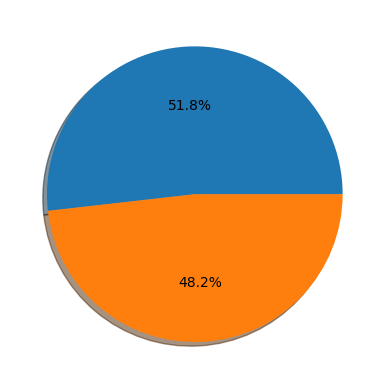

In [ ]:
sizes = df['class'].value_counts(sort = 1)
plt.pie(sizes, shadow=True, autopct='%1.1f%%')

Y (bağımlı) ve X (bağımsız)
değişkenleri oluşturulur.

In [ ]:
Y = df["class"].values
X = df.drop(labels = ["class"], axis=1)  #class değişkeni hariç tüm değişkenler X'e atanır.

Veri seti eğitim ve test olarak ikiye parçalanır.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=61)

Veri seti üzerinden kullanılacak lojistik regresyon modeli import edilir.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Modele ilişkin skorlar ölçülür.

In [ ]:
prediction_test = model.predict(X_test)
from sklearn import metrics
print ("f1-score(f-measure) = ", metrics.f1_score(y_test,prediction_test))
print ("Precision(Kesinlik)  = ", metrics.precision_score(y_test,prediction_test))
print ("Accuracy(Doğruluk)  = ", metrics.accuracy_score(y_test, prediction_test)) #Tahmin doğruluğu yazdırılır.

f1-score(f-measure) =  0.9490644490644491
Precision(Kesinlik)  =  0.9520333680917622
Accuracy(Doğruluk)  =  0.9517479074347612


Her değişken için model üzerindeki ağırlıkları ölçülür.

In [ ]:
print(model.coef_) #Her bağımsız değişken için katsayıları yazdırılır.
weights = pd.Series(model.coef_[0], index=X.columns.values)

print("Her degisken icin agirliklar asagidaki gibidir...")
print(weights)

[[-0.03253899  0.44482511 -0.04724321 -0.91999538 -0.45261558 -1.79306306
  -6.10417045  6.97298737 -0.1192509  -0.11690117 -1.73364355 -3.99790712
  -0.31820295 -0.11970327 -0.04963222  7.39368429  0.95790708  0.82422914
  -0.26238522 -0.34370699  0.10772433]]
Her degisken icin agirliklar asagidaki gibidir...
cap-shape                  -0.032539
cap-surface                 0.444825
cap-color                  -0.047243
bruises                    -0.919995
odor                       -0.452616
gill-attachment            -1.793063
gill-spacing               -6.104170
gill-size                   6.972987
gill-color                 -0.119251
stalk-shape                -0.116901
stalk-root                 -1.733644
stalk-surface-above-ring   -3.997907
stalk-surface-below-ring   -0.318203
stalk-color-above-ring     -0.119703
stalk-color-below-ring     -0.049632
veil-color                  7.393684
ring-number                 0.957907
ring-type                   0.824229
spore-print-color     